<a href="https://colab.research.google.com/github/GeeK1224/cau_ml_project/blob/main/cau_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Project Team ATES(отец)
This is our implementation of `CAU | ML Challenge | Final 2023`

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
# Colors
hex_green = '#63D297'
hex_black = '#202729'

## Step 1: Data Analysis

In [2]:
test_feature = pd.read_csv("kaggle_test_features_public.csv")
train_data = pd.read_csv("kaggle_train_data_public.csv")
sample = pd.read_csv("sample_submission.csv")

In [ ]:
columns = train_data.columns.values
for column in columns:
  print(f"{column} - {train_data[column].unique()}")

## Data Classification
Here we classified columns according to their usability and overall importance based only on common sense.

Classes:
1. 🟥 unusable
2. 🟩 usable
3. 🟪 questionable

| Column name | Status | Reason |
| --- | --- | --- |
| CustomerID | 🟩 | Just to distinguish users |
| Count | 🟥 | Only one value equal to 1 |
| Country | 🟥 | U.S.A. only |
| State | 🟥 | California only |
| City | 🟪 | Questionable, there are California cities, maybe there is some correlation based on city (can be used as categorical data) |
| Zip Code | 🟥 | a useless value that will throw off the weights |
| Lat Long | 🟥 | a useless value that will throw off the weights |
| Latitude | 🟥 | a useless value that will throw off the weights |
| Longitude | 🟥 | a useless value that will throw off the weights |
| Gender | 🟩 | Categorical data, contains useful information |
| Senior Citizen | 🟩 | Categorical data, contains useful information |
| Partner | 🟩 | Categorical data, contains useful information |
| Dependents | 🟩 | Categorical data, contains useful information |
| Tenure Months | 🟩 | Contains useful information, very important |
| Phone Service | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Multiple Lines | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Internet Service | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Online Security | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Online Backup | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Device Protection | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Tech Support | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Streaming TV | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Streaming Movies | 🟥 | In general, it’s difficult to say anything based on the lower values. |
| Contract | 🟩 | Categorical data, contains useful information, very useful |
| Paperless Billing | 🟥 | Not useful because the value can be obtained from another more informative column |
| Payment Method | 🟪 | questionable |
| Monthly Charges | 🟪 | questionable |
| Churn Score | 🟪 |  questionable |
| Churn Value | 🟩 |  Contain useful data |
| CLTV | 🟪 |  quetionable |
| Churn Reason | 🟪 | Well, I don’t know, when canceling a subscription or deleting a program, companies often ask you to leave a feedback, maybe you can classify problems under general cases and push the values |

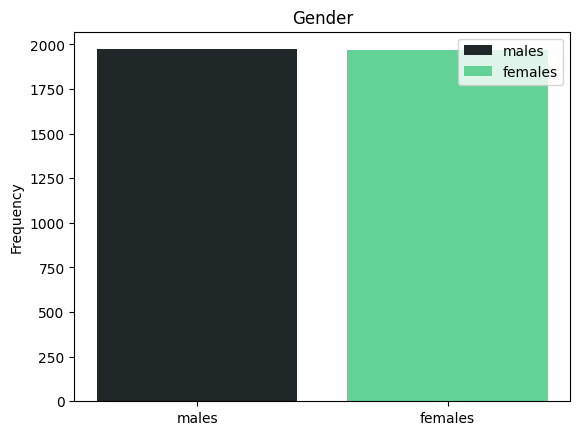

In [74]:
gender_labels = ['males', 'females']

males_count = len(train_data[train_data["Gender"] == "Male"]['Gender'])
females_count = len(train_data[train_data["Gender"] == "Female"]['Gender'])

plt.bar(gender_labels, [males_count, females_count], label=gender_labels, color=[hex_black, hex_green])
plt.title('Gender')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [28]:
print(males_count, females_count)

1973 1971


In [14]:
train_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,Churn Value,CLTV
count,3944.0,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000
mean,1.0,93504.840517,36.282735,-119.811722,32.413540,64.631415,58.683824,0.264959,4392.830122
std,0.0,1868.032274,2.460654,2.140234,24.556004,29.991988,21.497163,0.441368,1181.398114
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.400000,5.000000,0.000000,2003.000000
25%,1.0,92077.250000,34.037319,-121.806872,9.000000,35.637500,41.000000,0.000000,3468.750000
50%,1.0,93550.500000,36.375590,-119.687964,29.000000,70.250000,61.000000,0.000000,4505.000000
75%,1.0,95337.250000,38.158676,-118.057091,55.000000,89.750000,75.000000,1.000000,5374.750000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.650000,100.000000,1.000000,6500.000000


In [31]:
cities = train_data["City"].unique()

len(cities)

1102

In [34]:
train_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [77]:
score_data = train_data[train_data["Churn Value"] == 1]['Churn Score']
reason_data = train_data[train_data["Churn Value"] == 1]['Churn Reason']
score_reason_data = pd.concat([score_data, reason_data], axis=1)
reasons = score_reason_data['Churn Reason'].unique()

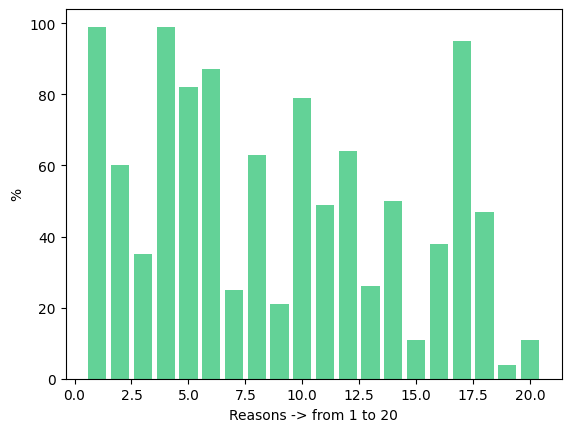

In [90]:
number_reasons = []

for reason in reasons:
  reason_occurences = len(reason_data[reason_data == reason])
  number_reasons.append(reason_occurences)

plt.bar(range(1, 21), number_reasons, color=hex_green)
plt.ylabel('%')
plt.xlabel('Reasons -> from 1 to 20')
plt.show()

#### Reasons that lead to churn
1. Competitor offered more data ~ 10.0%
2. Product dissatisfaction ~ 6.0%
3. Moved ~ 4.0%
4. Attitude of support person ~ 10.0%
5. Don't know ~ 8.0%
6. Competitor made better offer ~ 9.0%
7. Limited range of services ~ 3.0%
8. Network reliability ~ 7.0%
9. Long distance charges ~ 3.0%
10. Attitude of service provider ~ 8.0%
11. Lack of self-service on Website ~ 5.0%
12. Competitor had better devices ~ 7.0%
13. Lack of affordable download/upload speed ~ 3.0%
14. Price too high ~ 5.0%
15. Poor expertise of phone support ~ 2.0%
16. Extra data charges ~ 4.0%
17. Competitor offered higher download speeds ~ 10.0%
18. Service dissatisfaction ~ 5.0%
19. Deceased ~ 1.0%
20. Poor expertise of online support ~ 2.0%